In [141]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [142]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [143]:
X_test.shape

(10000, 32, 32, 3)

In [145]:

y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [146]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [147]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

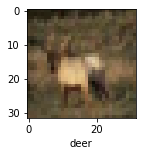

In [148]:
plot_sample(X_train, y_train,3)

In [149]:
X_train=X_train/255
X_test = X_test/255

In [150]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 67s 42ms/step - loss: 1.9292 - accuracy: 0.3066
Epoch 2/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6457 - accuracy: 0.4198
Epoch 3/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5486 - accuracy: 0.4546
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4868 - accuracy: 0.47470s - loss: 1.4869 - accuracy: 
Epoch 5/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.4327 - accuracy: 0.4958


In [152]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 64.6910 - accuracy: 0.1820


[64.69095611572266, 0.18199999630451202]

In [169]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('Clasification Report:\n', classification_report(y_test, y_pred_classes))

Clasification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55      1000
           1       0.67      0.56      0.61      1000
           2       0.44      0.21      0.29      1000
           3       0.34      0.18      0.24      1000
           4       0.57      0.21      0.31      1000
           5       0.26      0.69      0.38      1000
           6       0.59      0.43      0.50      1000
           7       0.51      0.58      0.54      1000
           8       0.62      0.60      0.61      1000
           9       0.54      0.61      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [153]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [154]:
cnn.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [155]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.7092 - accuracy: 0.3843
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2512 - accuracy: 0.5586
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1341 - accuracy: 0.60400s - loss: 1.1342 - accuracy: 0.
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0483 - accuracy: 0.6347
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0012 - accuracy: 0.6532
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9302 - accuracy: 0.6767
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8811 - accuracy: 0.6946
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8586 - accuracy: 0.7018
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8199 - accuracy: 0.7127
Epoch 10/10
1563/1563 [=========

In [157]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0601 - accuracy: 0.6461


[1.0601470470428467, 0.6460999846458435]

In [158]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

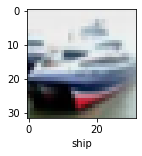

In [159]:
plot_sample(X_test, y_test,1)

In [160]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[1.26257082e-02, 8.50739947e-04, 5.97786810e-03, 7.08761752e-01,
        2.33963761e-03, 3.76355797e-02, 4.58143167e-02, 3.80077341e-04,
        1.82779238e-01, 2.83509796e-03],
       [1.44932820e-02, 4.56036806e-01, 1.74548109e-06, 6.70217105e-07,
        2.84678640e-06, 8.26036484e-08, 2.00655670e-08, 1.32489092e-07,
        5.26973903e-01, 2.49052583e-03],
       [2.98314065e-01, 6.81024492e-02, 3.60567193e-03, 1.06072100e-03,
        2.56461650e-03, 3.56503093e-04, 2.04054322e-05, 1.35791872e-03,
        4.76512820e-01, 1.48104846e-01],
       [3.79356265e-01, 5.62607450e-03, 7.59113580e-02, 2.84665916e-03,
        1.88632756e-02, 1.51208209e-04, 5.29937958e-03, 6.31497460e-05,
        5.11477411e-01, 4.05199797e-04],
       [7.08627468e-08, 1.09804005e-05, 2.09564809e-03, 2.17968542e-02,
        2.51806825e-01, 1.54616288e-03, 7.22622991e-01, 1.52589124e-07,
        1.20148681e-04, 9.36211109e-08]], dtype=float32)

In [161]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [162]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

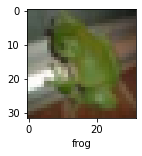

In [180]:
plot_sample(X_test, y_test,7)

In [181]:
classes[y_classes[7]]

'frog'

In [182]:
print('Classification Report:\n', classification_report(y_test, y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.74      0.68      1000
           1       0.80      0.71      0.76      1000
           2       0.52      0.49      0.51      1000
           3       0.48      0.45      0.46      1000
           4       0.55      0.64      0.59      1000
           5       0.62      0.48      0.54      1000
           6       0.68      0.79      0.73      1000
           7       0.77      0.65      0.70      1000
           8       0.67      0.81      0.73      1000
           9       0.75      0.69      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000

